In [1]:
from periomod.data import StaticProcessEngine

engine = StaticProcessEngine()
data = engine.load_data(path="../data/raw/raw_data.xlsx")
data = engine.process_data(data)
#engine.save_data(df=data, path="data/processed/processed_data.csv")
data

Initial number of patients: 746
Initial number of rows: 100950
Number of unique patients removed: 7
Number of rows removed: 1026
Remaining number of patients: 739
Remaining number of rows: 99924



/Users/toby/periodontal-modeling/periomod/data/_preprocessing.py:273: UserWarning: Missing values found: 
bodymassindex              1560
periofamilyhistory        10056
diabetes                    666
smokingtype               38220
cigarettenumber           85164
stresslvl                  2502
boprevaluation              567
percussion-sensitivity      222
sensitivity                 312
furcationbaseline         88304
recbaseline                9878
plaque                     2513
bop                         633
dtype: int64
  self.create_tooth_features(self.impute_missing_values(data=data))


No missing values after imputation.


,id_patient,age,gender,bodymassindex,periofamilyhistory,diabetes,smokingtype,cigarettenumber,antibiotictreatment,stresslvl,...,recbaseline,plaque,bop,side_infected,tooth_infected,infected_neighbors,pocketclosure,pdgroupbase,pdgrouprevaluation,improvement
0,1,53,1,35.430839,2,1,1,0.0,1,2,...,0.0,0.0,0.0,0,0,0.0,1,0,0,0
1,1,53,1,35.430839,2,1,1,0.0,1,2,...,0.0,1.0,0.0,0,1,0.0,1,0,0,0
2,1,53,1,35.430839,2,1,1,0.0,1,2,...,0.0,1.0,0.0,0,1,1.0,1,0,0,0
3,1,53,1,35.430839,2,1,1,0.0,1,2,...,0.0,0.0,0.0,0,1,1.0,1,0,0,0
4,1,53,1,35.430839,2,1,1,0.0,1,2,...,0.0,1.0,0.0,0,1,2.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100945,1948,58,0,20.571429,2,1,3,0.0,1,0,...,0.0,1.0,0.0,1,1,1.0,0,2,2,0
100946,1948,58,0,20.571429,2,1,3,0.0,1,0,...,0.0,1.0,0.0,1,1,1.0,0,2,2,0
100947,1948,58,0,20.571429,2,1,3,0.0,1,0,...,0.0,1.0,1.0,1,1,1.0,0,2,1,1
100948,1948,58,0,20.571429,2,1,3,0.0,1,0,...,0.0,1.0,1.0,1,1,1.0,0,2,1,1


In [ ]:
import pandas as pd

# helper: find a patient with full coverage on two teeth & side‐sets
def find_patient_with_teeth(df, gender, tooth_specs):
    """
    tooth_specs: list of tuples (tooth_number, required_side_set)
    """
    # only patients of that gender
    subs = df[df.gender == gender]
    # group by patient
    for pid, grp in subs.groupby('id_patient'):
        ok = True
        for tooth_num, sides_req in tooth_specs:
            sides_found = set(grp.loc[grp.tooth == tooth_num, 'side'])
            if not sides_req.issubset(sides_found):
                ok = False
                break
        if ok:
            return pid
    raise ValueError(f"No gender={gender} patient has all teeth/sides")

# define what you need
specs0 = [(11, {1,2,3}), (35, {4,5,6})]  # for gender 0
specs1 = [(23, {1,2,3}), (46, {4,5,6})]  # for gender 1

# find patient IDs
patient0 = find_patient_with_teeth(data, gender=0, tooth_specs=specs0)
patient1 = find_patient_with_teeth(data, gender=1, tooth_specs=specs1)

# build boolean masks
mask0 = (
    (data.id_patient == patient0)
    & (
        ((data.tooth == 11) & data.side.isin([1,2,3]))
      | ((data.tooth == 35) & data.side.isin([4,5,6]))
    )
)
mask1 = (
    (data.id_patient == patient1)
    & (
        ((data.tooth == 23) & data.side.isin([1,2,3]))
      | ((data.tooth == 46) & data.side.isin([4,5,6]))
    )
)

# grab and reorder
cols = [
    'id_patient',
    'age',
    'bodymassindex',xw
    'tooth',
    'mobility',
    'restoration',
    'side',
    'pdbaseline',
    'pdrevaluation',
]
subset = data.loc[mask0 | mask1, cols] \
             .sort_values(['id_patient','tooth','side']) \
             .reset_index(drop=True)

subset


,id_patient,age,bodymassindex,tooth,mobility,restoration,side,pdbaseline,pdrevaluation
0,8,57,25.165146,23,0,2,1,2,3
1,8,57,25.165146,23,0,2,2,1,2
2,8,57,25.165146,23,0,2,3,3,2
3,8,57,25.165146,46,0,2,4,3,3
4,8,57,25.165146,46,0,2,5,1,2
5,8,57,25.165146,46,0,2,6,2,3
6,20,49,19.100092,11,1,3,1,3,3
7,20,49,19.100092,11,1,3,2,3,2
8,20,49,19.100092,11,1,3,3,3,2
9,20,49,19.100092,35,1,3,4,3,2


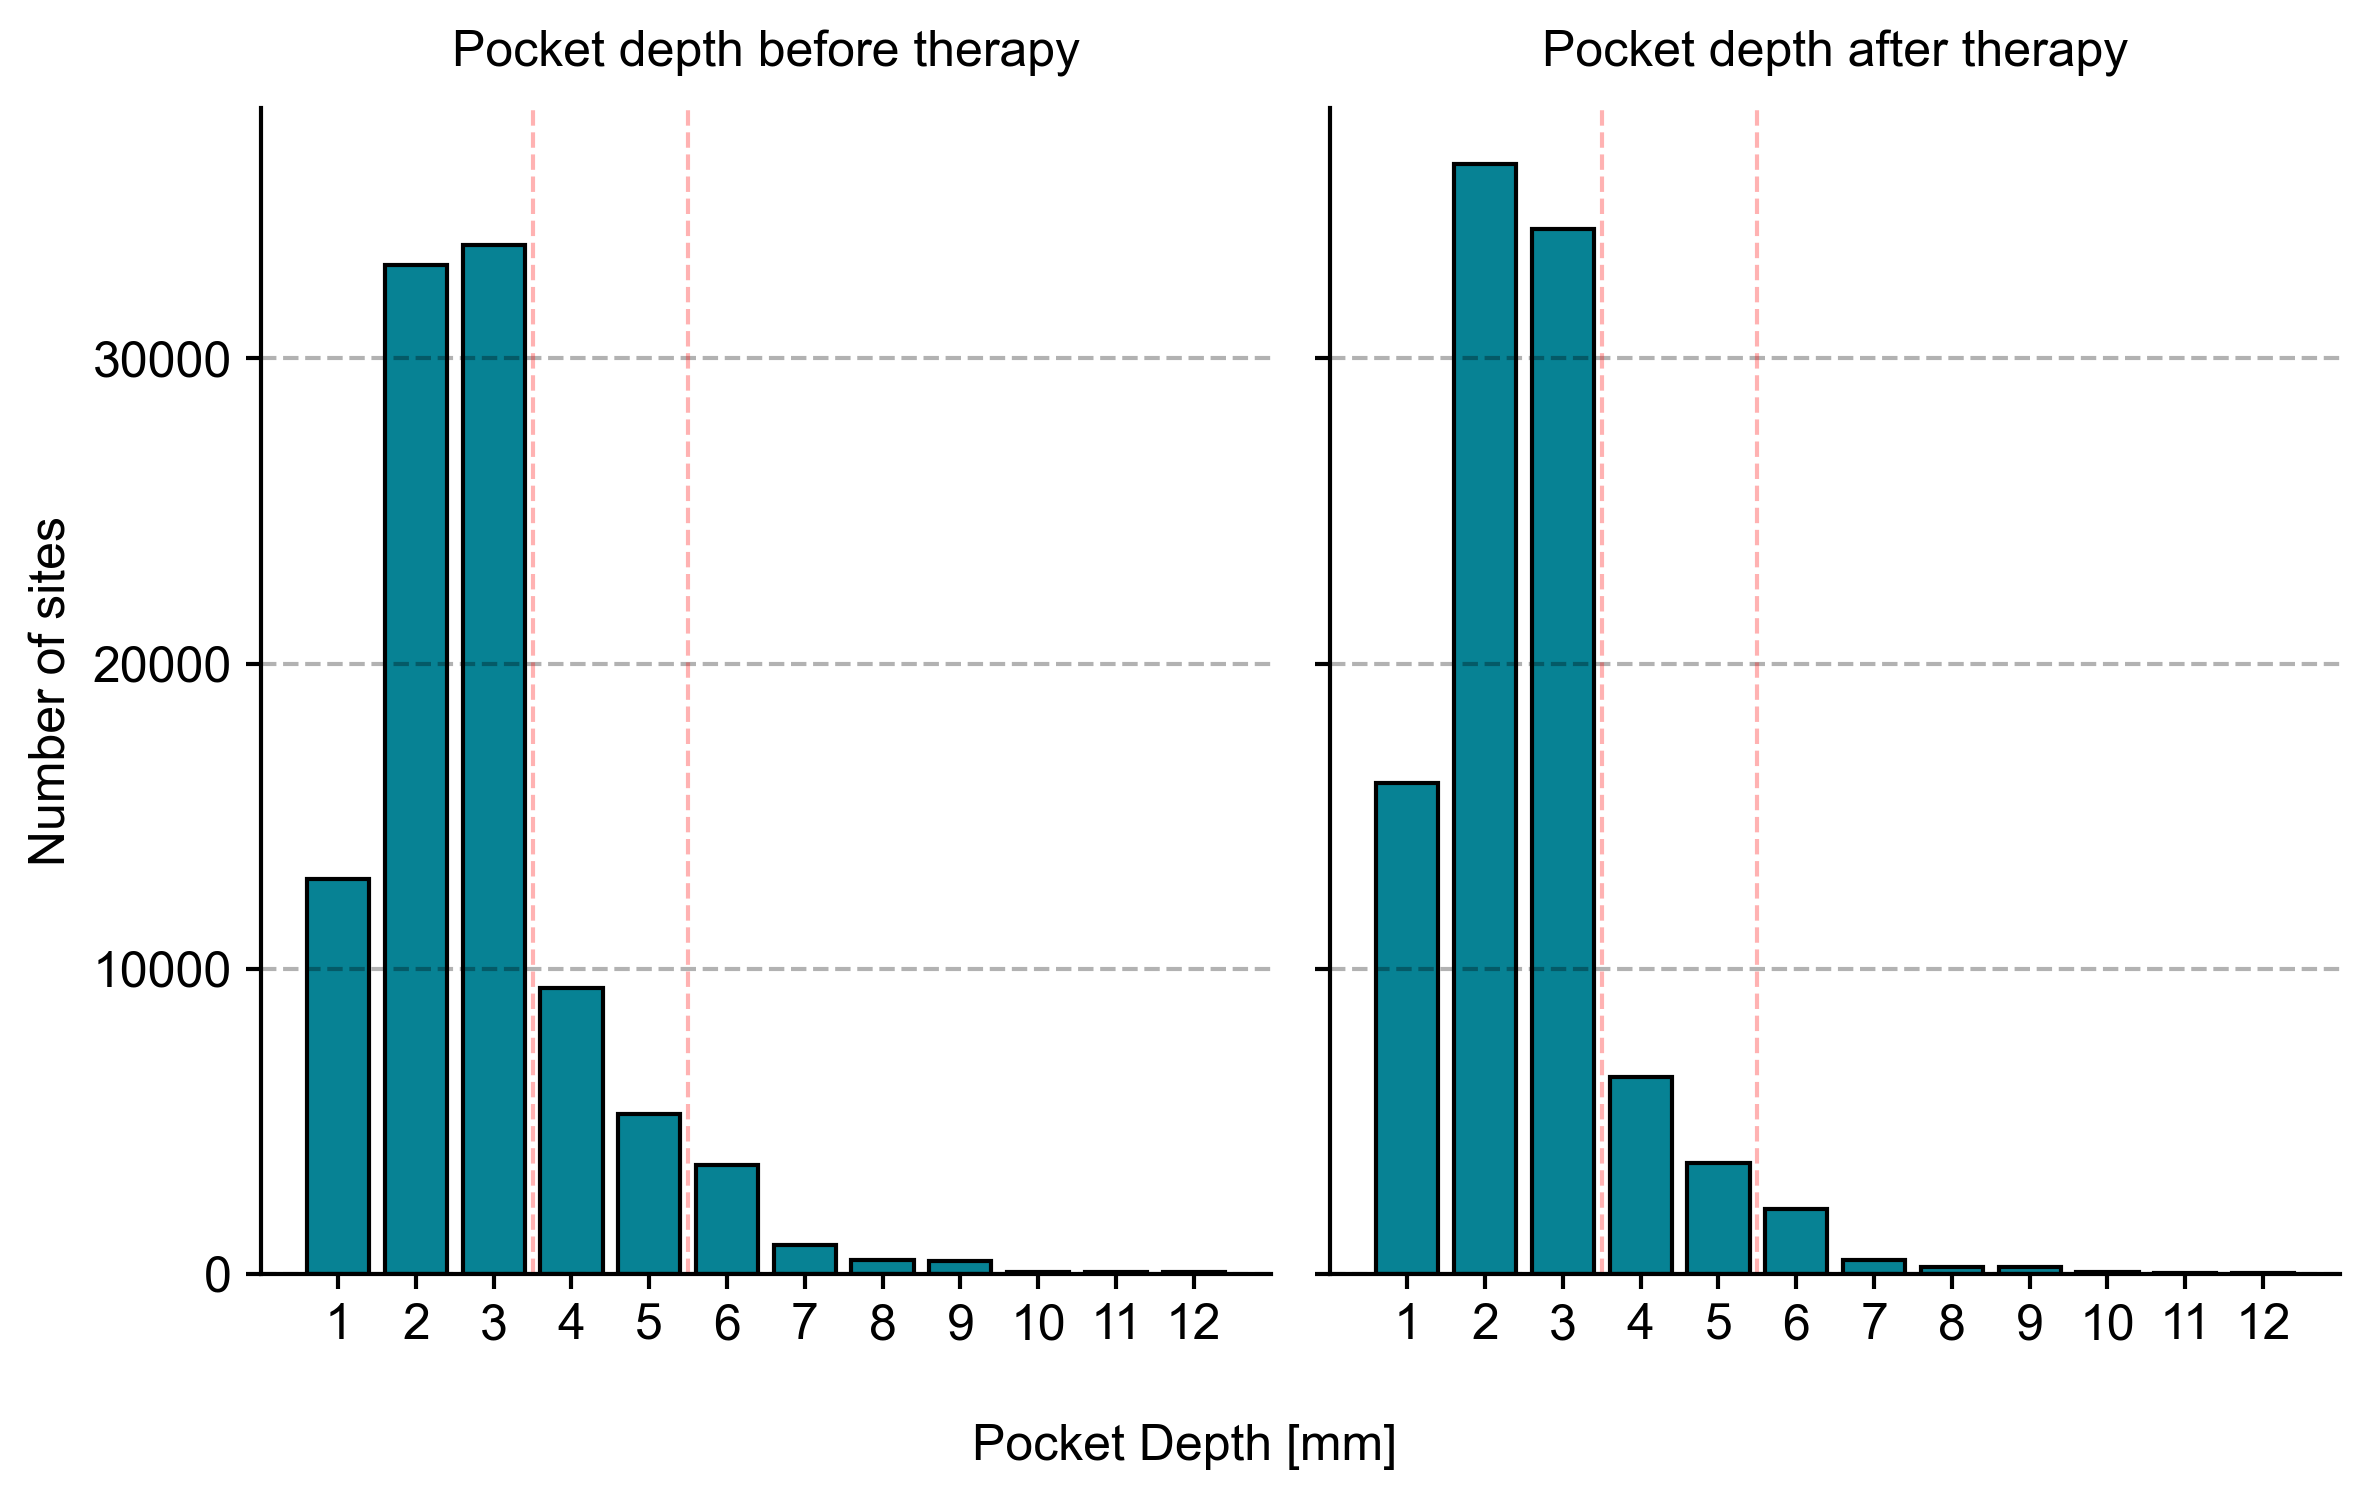

In [12]:
from periomod.data import ProcessedDataLoader
from periomod.descriptives import DescriptivesPlotter

dataloader = ProcessedDataLoader(
    task="pocketclosure", encoding="one_hot", encode=True, scale=True
)

data = dataloader.load_data(path="../data/processed/processed_data.csv")

# instantiate plotter with dataframe
plotter = DescriptivesPlotter(data)
plotter.pocket_comparison(col1="pdbaseline", col2="pdrevaluation")

In [2]:
from periomod.base import Patient, Side, Tooth
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper
from periomod.wrapper import load_benchmark, load_learners

wrapper = BenchmarkWrapper(
    task="pocketclosure",
    encodings=["one_hot"],
    learners=["xgb"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["brier_score"],
    sampling=[None],
    factor=2,
    n_configs=5,
    n_jobs=-1,
    path="../data/processed/processed_data.csv"
)
                           
#learners = load_learners(path="../models/pocketclosure_experiments")
benchmark, learners = wrapper.wrapped_benchmark()

In [3]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="brier_score",
    aggregate=True,
    path="../data/processed/processed_data.csv"
)

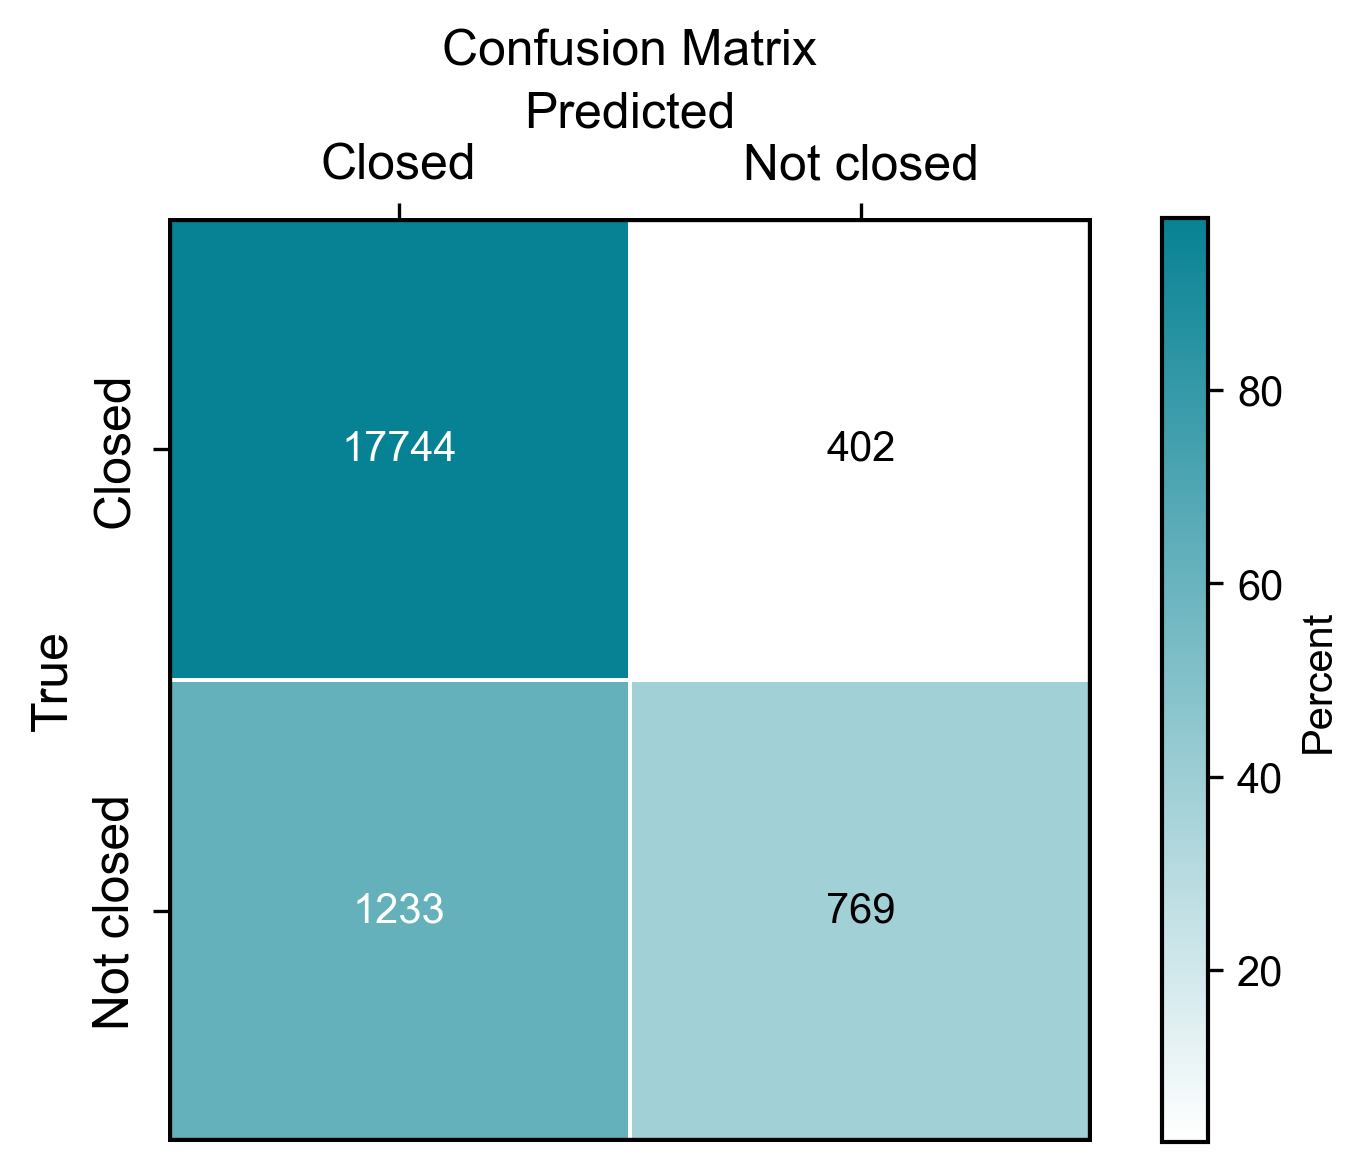

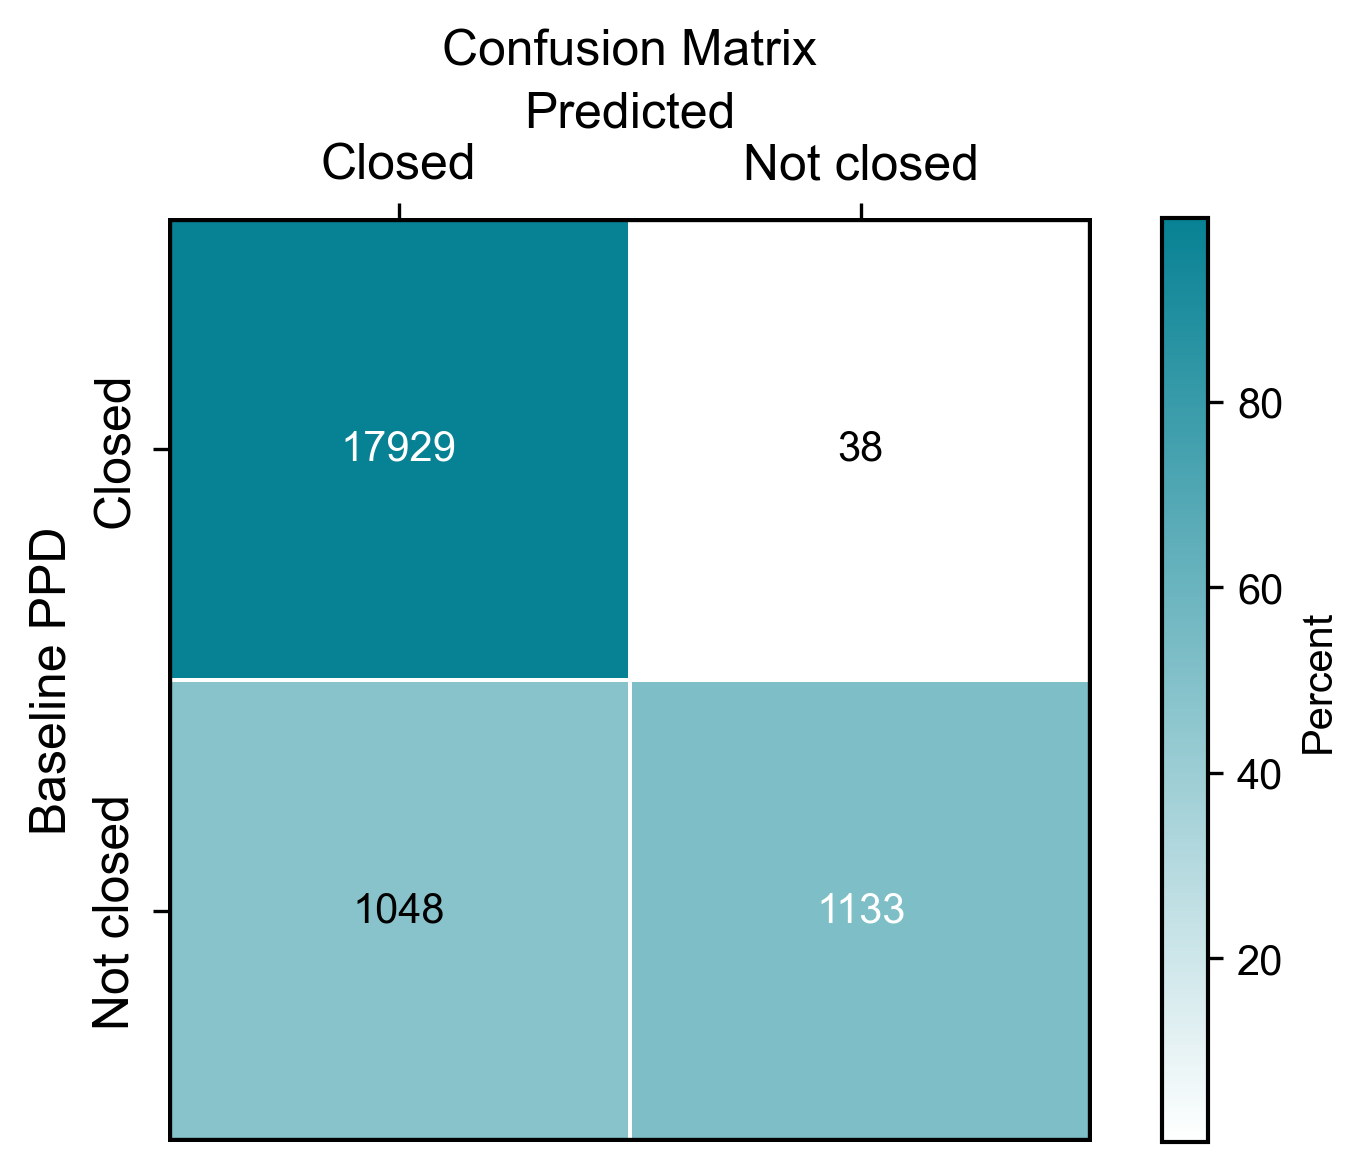

Average and Median Brier Scores by y:
            y      mean    median
0      Closed  0.019057  0.000306
1  Not closed  0.431826  0.376046


<Figure size 1200x1200 with 0 Axes>

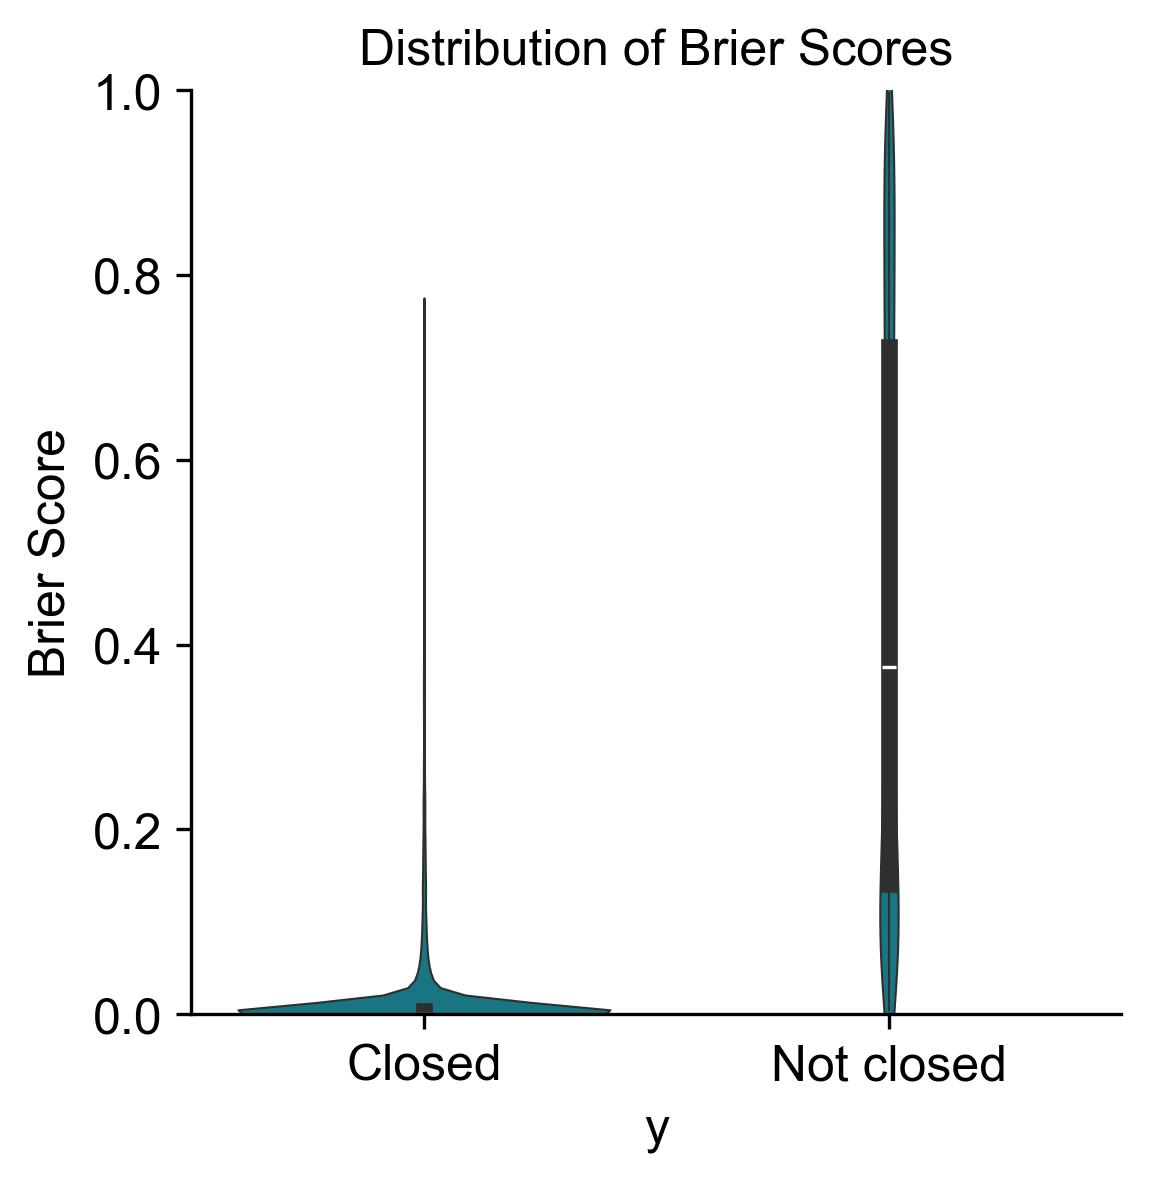

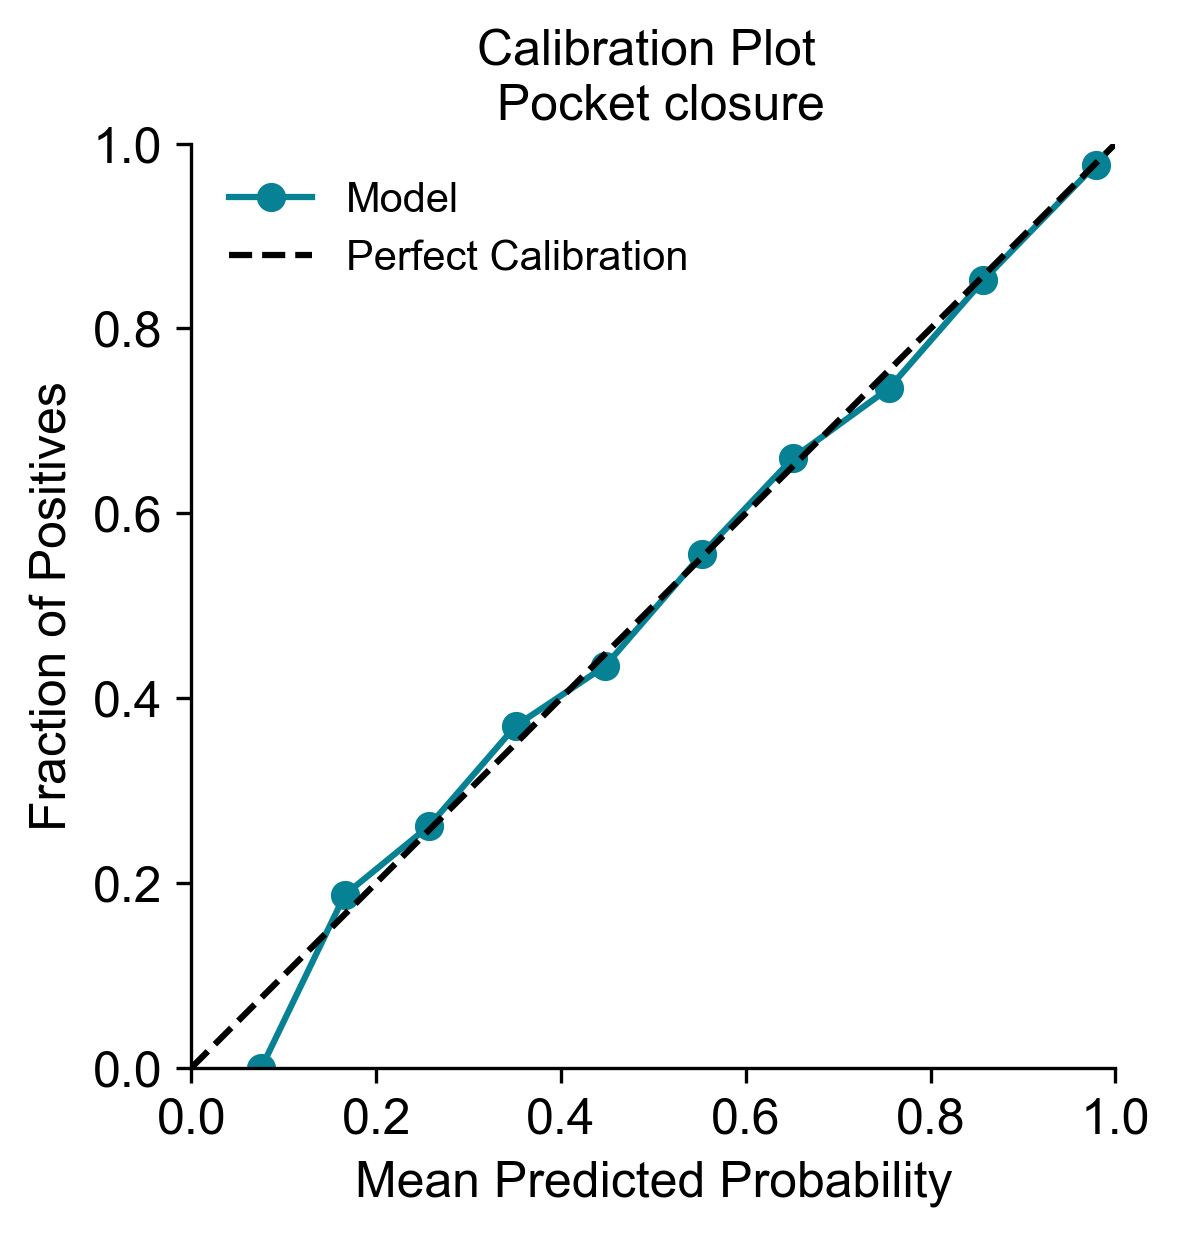

In [4]:
evaluator.wrapped_evaluation(save=True)

Number of patients in test set: 148
Number of tooth sites: 20148


 99%|===================| 20041/20148 [02:45<00:00]        

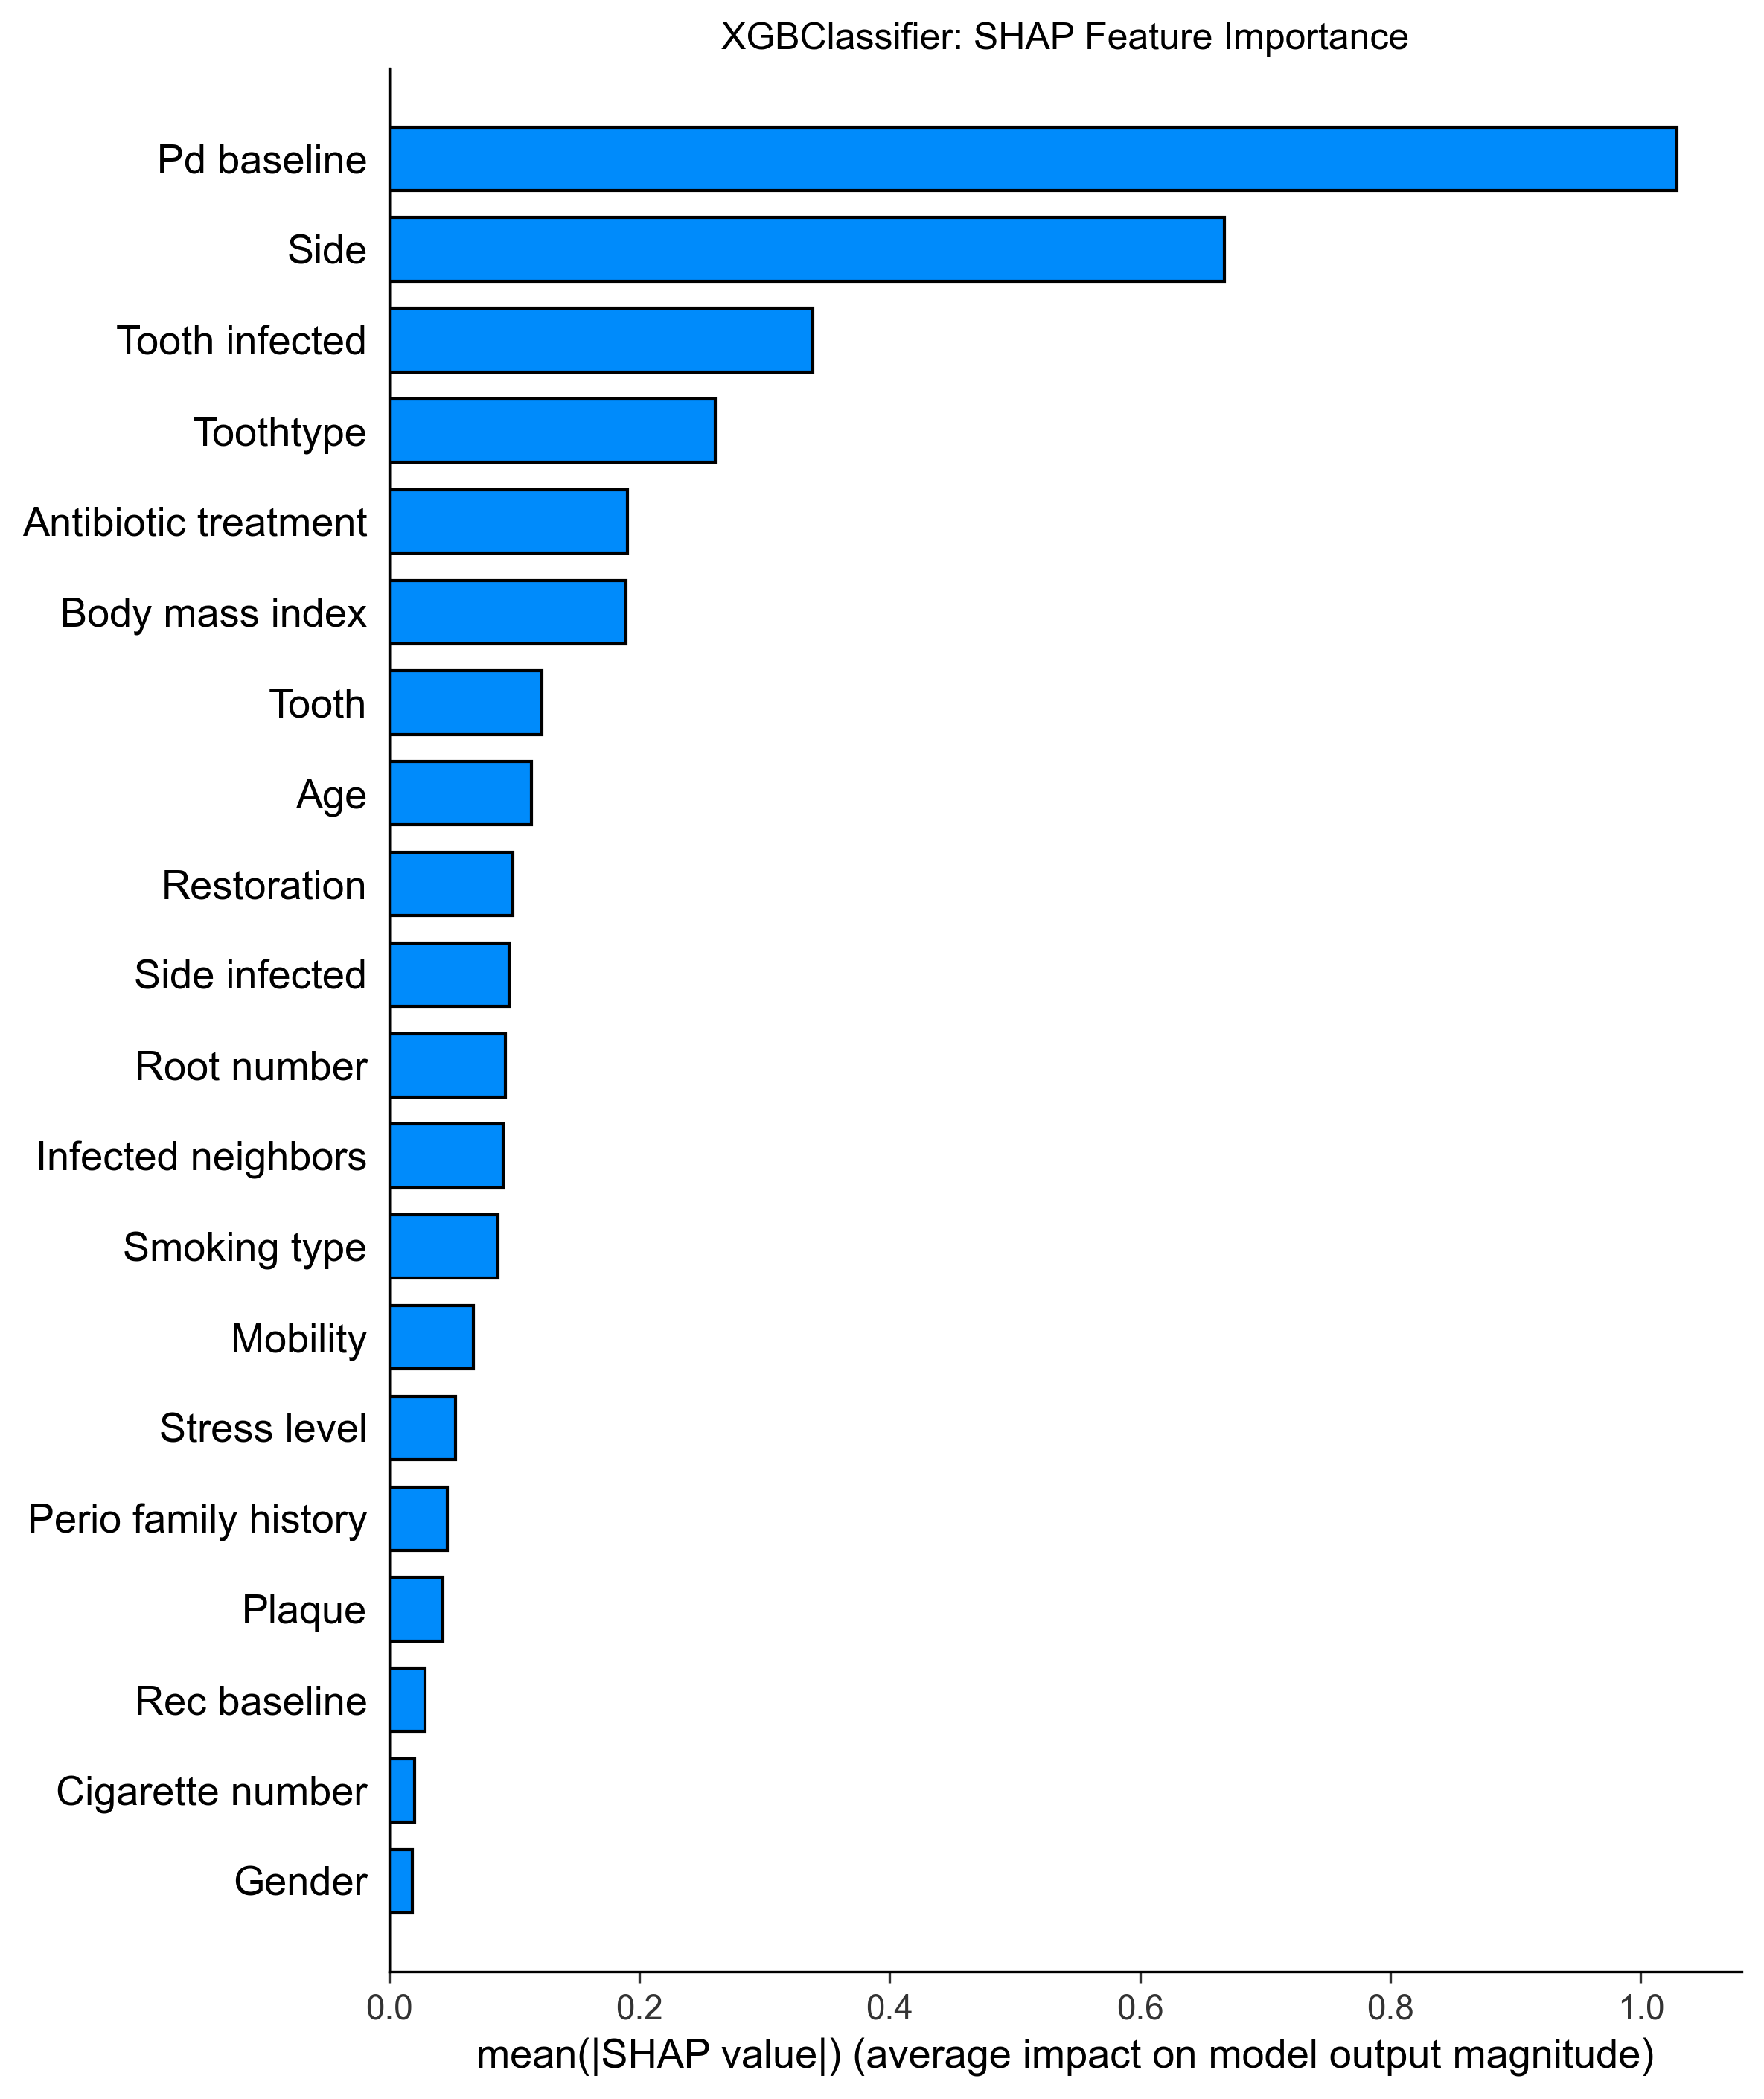

In [5]:
evaluator.evaluate_feature_importance(fi_types=["shap"], save=True, name="shap")